## Understand Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
data = pd.read_csv("alzheimers_disease_data.csv")
data.shape

(2149, 35)

### Drop PatientID & DoctorInCharge

In [5]:
data.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)
data.head(5)

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0   73       0          0               2  22.927749        0   
1   89       0          0               0  26.827681        0   
2   73       0          3               1  17.795882        0   
3   74       1          0               1  33.800817        1   
4   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0           13.297218          6.327112     1.347214      9.025679  ...   
1            4.542524          7.619885     0.518767      7.151293  ...   
2           19.555085          7.844988     1.826335      9.673574  ...   
3           12.209266          8.428001     7.435604      8.392554  ...   
4           18.454356          6.310461     0.795498      5.597238  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877                 0                   0  1.725883   
1              7.118696                 0                   0  2.592424   
2              5.895077                 0                   0  7.119548   
3              8.965106                 0                   1  6.481226   
4              6.045039                 0                   0  0.014691   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0                          1   
1          0               0                   0                          0   
2          0               1                   0                          1   
3          0               0                   0                          0   
4          0               0                   1                          1   

   Forgetfulness  Diagnosis  
0              0          0  
1              1          0  
2              0          0  
3              0          0  
4              0          0  

[5 rows x 33 columns]

In [39]:
data.shape

(2149, 33)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [10]:
data.nunique() # Number of unique values can help in determining which features are numerical which ones are categorical features.

Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation                  2
PersonalityCha

In [12]:
# Check for duplicate rows and missing values
print("Duplicate rows: ", sum(data.duplicated()))
print(data.isnull().sum())

Duplicate rows:  0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness       

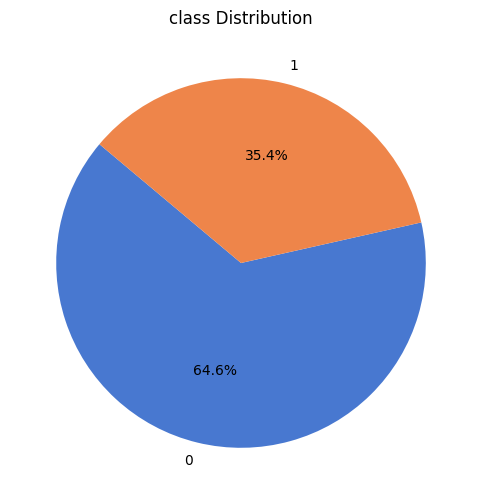

In [15]:
# Define the Response categories and count occurances
categories = [0, 1]
counts = data.Diagnosis.value_counts().tolist()

# Color palette
colors = sns.color_palette("muted")

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('class Distribution')
plt.show()

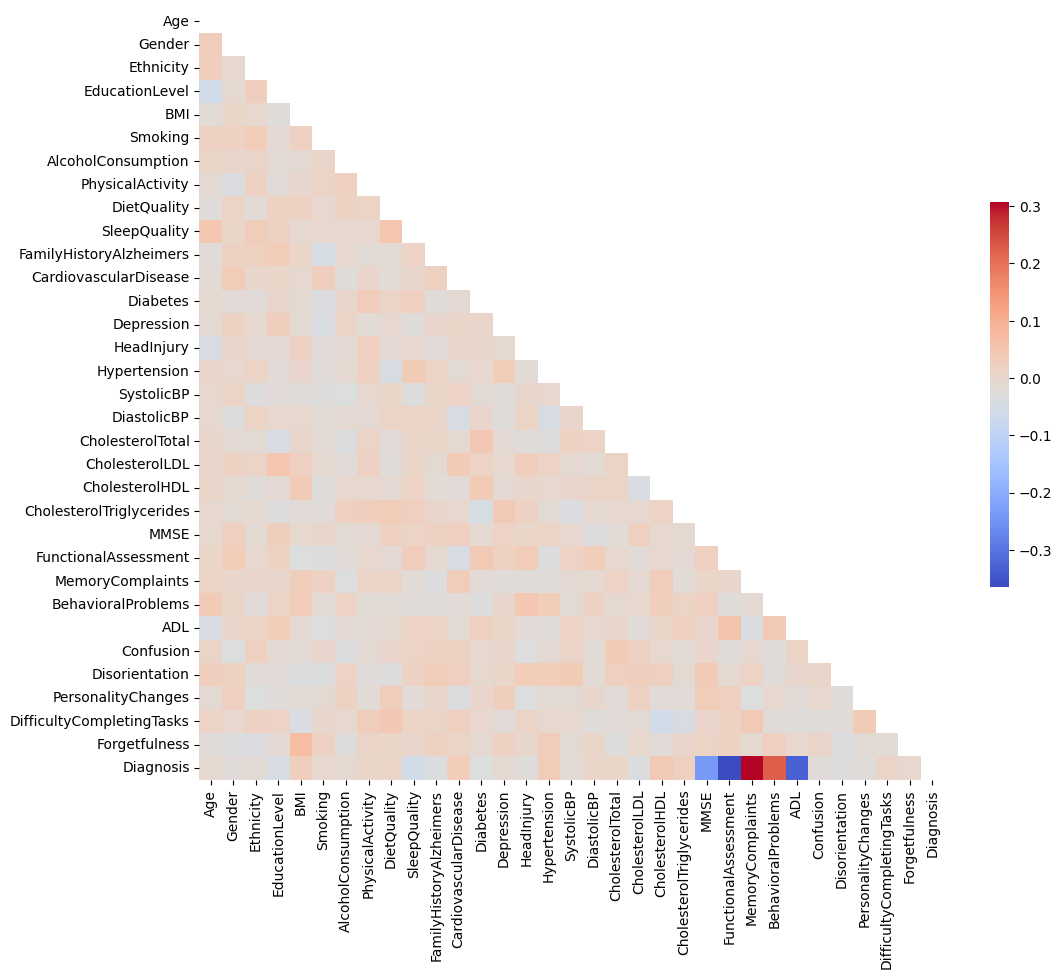

In [19]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

## separet feature and class

In [7]:
x = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

## Data Exploration Summary

- The dataset contains a total of 2,149 observations.
- All values are non-null & numerical.
- There are no duplicate records or missing values.
- the dataset consists of 32 features
- the data has a fairly distributed class distribution 64.6 / 35.4

## encode Nominal Categorical (Ethnicity & EducationLevel)

In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Step 1: Select the nominal categorical features
nominal_features = ['Ethnicity', 'EducationLevel']

# Step 2: Initialize One-Hot Encoder without dropping any category
ohe = OneHotEncoder(drop=None, sparse_output=False)  # Keep all categories

# Step 3: Fit and transform the categorical features
encoded_features = ohe.fit_transform(data[nominal_features])

# Step 4: Convert the encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(nominal_features))

# Step 5: Drop the original categorical columns and merge encoded features
data = data.drop(columns=nominal_features).reset_index(drop=True)  # Drop original categorical columns
data = pd.concat([data, encoded_df], axis=1)  # Merge encoded data

# Step 6: Verify the transformed data
print("Updated Dataset After One-Hot Encoding:")
print(data.head())


Updated Dataset After One-Hot Encoding:
   Age  Gender        BMI  Smoking  AlcoholConsumption  PhysicalActivity  \
0   73       0  22.927749        0           13.297218          6.327112   
1   89       0  26.827681        0            4.542524          7.619885   
2   73       0  17.795882        0           19.555085          7.844988   
3   74       1  33.800817        1           12.209266          8.428001   
4   89       0  20.716974        0           18.454356          6.310461   

   DietQuality  SleepQuality  FamilyHistoryAlzheimers  CardiovascularDisease  \
0     1.347214      9.025679                        0                      0   
1     0.518767      7.151293                        0                      0   
2     1.826335      9.673574                        1                      0   
3     7.435604      8.392554                        0                      0   
4     0.795498      5.597238                        0                      0   

   ...  Forgetfulness 

In [43]:
data.shape

(2149, 39)

## Spearman correlation


Top 20 Features Based on Spearman Correlation:
                     Feature  Spearman_Correlation       P_value
21      FunctionalAssessment             -0.366687  2.230193e-69
24                       ADL             -0.330450  6.391765e-56
22          MemoryComplaints              0.306742  4.760134e-48
20                      MMSE             -0.236271  1.198530e-28
23        BehavioralProblems              0.224350  6.369488e-26
7               SleepQuality             -0.056069  9.328805e-03
18            CholesterolHDL              0.042542  4.862145e-02
34          EducationLevel_0              0.039049  7.031787e-02
32               Ethnicity_2              0.036854  8.762794e-02
13              Hypertension              0.035080  1.039986e-01
31               Ethnicity_1             -0.034712  1.076814e-01
8    FamilyHistoryAlzheimers             -0.032900  1.273417e-01
17            CholesterolLDL             -0.032010  1.379601e-01
10                  Diabetes             -

C:\Users\chapp\AppData\Local\Temp\ipykernel_3132\1317327082.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_features, x='Spearman_Correlation', y='Feature', orient='h', palette='coolwarm')


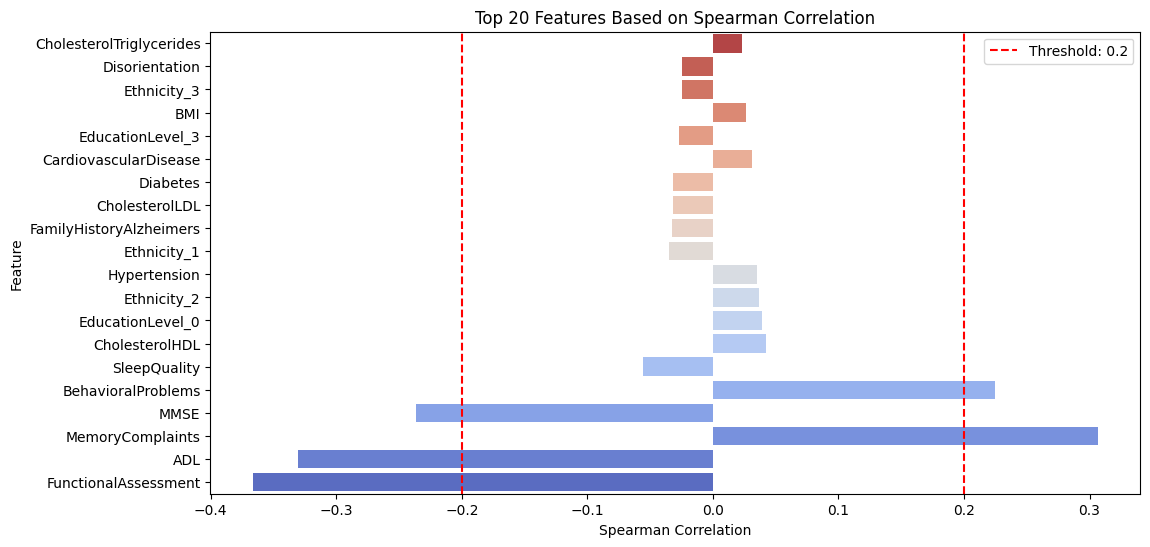

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Step 1: Compute Spearman Correlation for All Features
spearman_results = []

for col in x.columns:  # X contains both numerical and encoded categorical features
    rho, p_value = spearmanr(x[col], y)  # Compute Spearman's correlation
    spearman_results.append((col, rho, p_value))

# Step 2: Convert Results to a DataFrame
spearman_df = pd.DataFrame(spearman_results, columns=['Feature', 'Spearman_Correlation', 'P_value'])

# Step 3: Sort Features by Absolute Spearman Correlation (Descending)
spearman_df['Abs_Spearman'] = spearman_df['Spearman_Correlation'].abs()  # Get absolute values
spearman_df = spearman_df.sort_values(by='Abs_Spearman', ascending=False)  # Sort by importance

# Step 4: Select the Top 20 Features
top_20_features = spearman_df.head(20)

# Step 5: Print Top 20 Features
print("\nTop 20 Features Based on Spearman Correlation:")
print(top_20_features[['Feature', 'Spearman_Correlation', 'P_value']])

# Step 6: Visualize the Top 20 Features
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_features, x='Spearman_Correlation', y='Feature', orient='h', palette='coolwarm')
plt.axvline(0.2, color='red', linestyle='--', label='Threshold: 0.2')
plt.axvline(-0.2, color='red', linestyle='--')
plt.title('Top 20 Features Based on Spearman Correlation')
plt.xlabel('Spearman Correlation')
plt.ylabel('Feature')
plt.legend()
plt.gca().invert_yaxis()  # Highest correlation at the top
plt.show()


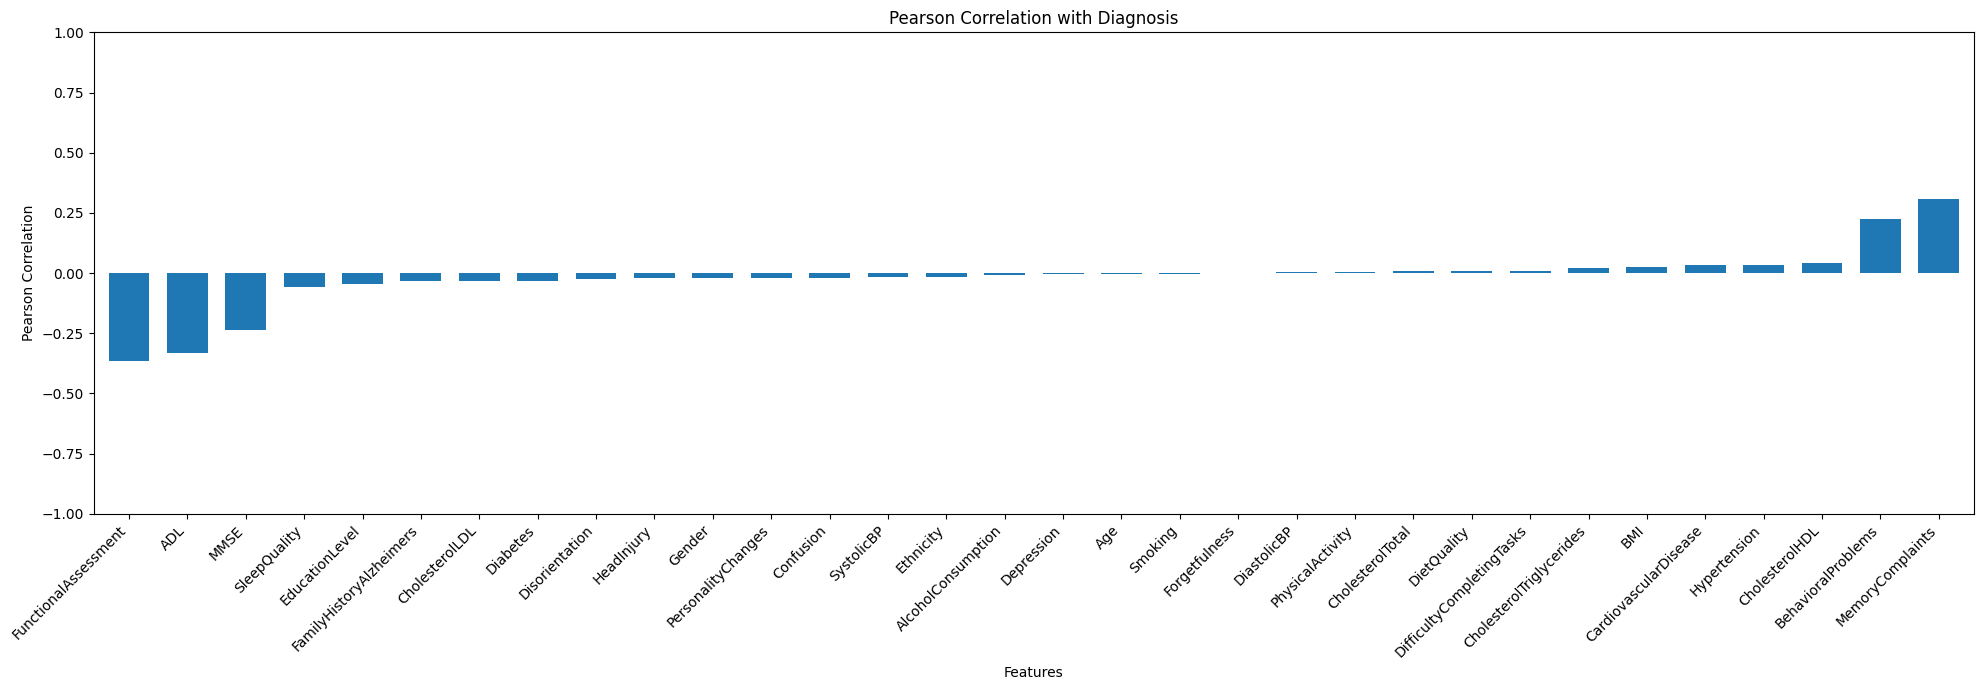

In [29]:
# Compute Pearson correlation coefficients
correlations = data.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Diagnosis')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Detecting outliers using Plotly

In [32]:
# Define numerical columns
numerical_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

In [34]:
# Define catagorical columns
categorical_columns = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


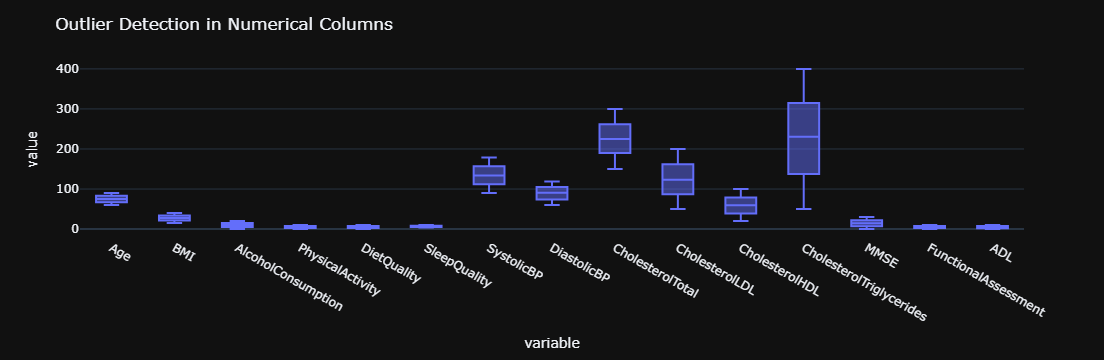

In [36]:
import plotly.express as px
# Detecting outliers using Plotly
fig = px.box(data, y=numerical_columns)
fig.update_layout(title="Outlier Detection in Numerical Columns", template="plotly_dark")
fig.show()

## PCA


Top 20 Features Based on PCA Contribution:
['Ethnicity_2', 'EducationLevel_3', 'Ethnicity_3', 'Diabetes', 'CholesterolTriglycerides', 'Ethnicity_1', 'MemoryComplaints', 'BMI', 'DietQuality', 'SleepQuality', 'FunctionalAssessment', 'CholesterolLDL', 'AlcoholConsumption', 'Hypertension', 'CholesterolHDL', 'Forgetfulness', 'BehavioralProblems', 'PersonalityChanges', 'Gender', 'HeadInjury']


C:\Users\chapp\AppData\Local\Temp\ipykernel_3132\294367754.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca_importance.head(20), y=top_20_features, orient='h', palette='coolwarm')


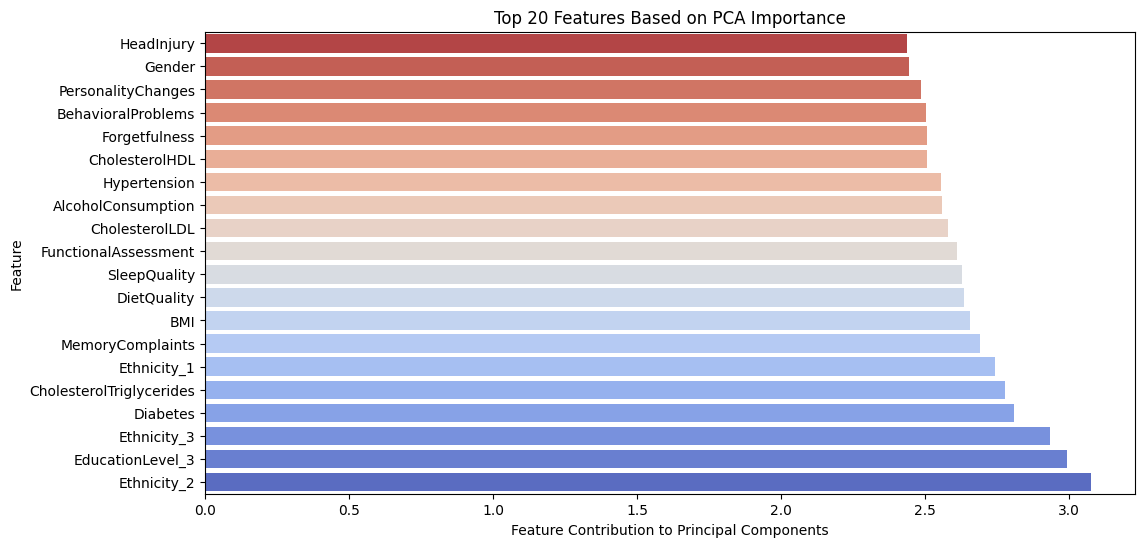

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is the dataset with all features (numerical + encoded categorical)

# Step 2: Apply PCA
pca = PCA(n_components=20)  # Reduce to top 20 principal components
X_pca = pca.fit_transform(X_scaled)

# Step 3: Get Feature Contributions to Principal Components
pca_loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(20)])
pca_importance = pca_loadings.abs().sum(axis=1).sort_values(ascending=False)  # Sum absolute contributions

# Step 4: Select the Top 20 Features Based on PCA Contribution
top_20_features = pca_importance.head(20).index.tolist()

# Step 5: Print and Visualize the Top 20 Features
print("\nTop 20 Features Based on PCA Contribution:")
print(top_20_features)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=pca_importance.head(20), y=top_20_features, orient='h', palette='coolwarm')
plt.title('Top 20 Features Based on PCA Importance')
plt.xlabel('Feature Contribution to Principal Components')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


##  Mutual Information (MI) for Feature Selection

Top 20 Features by Mutual Information Score:
                 Feature  MI Score
21  FunctionalAssessment  0.095454
24                   ADL  0.076564
20                  MMSE  0.066278
22      MemoryComplaints  0.050898
23    BehavioralProblems  0.029937
4     AlcoholConsumption  0.017780
18        CholesterolHDL  0.017349
32           Ethnicity_2  0.012527
30           Ethnicity_0  0.009790
7           SleepQuality  0.009691
27    PersonalityChanges  0.008789
5       PhysicalActivity  0.007947
15           DiastolicBP  0.007522
29         Forgetfulness  0.006378
11            Depression  0.004770
0                    Age  0.003826
33           Ethnicity_3  0.003214
37      EducationLevel_3  0.002929
26        Disorientation  0.001577
1                 Gender  0.001368


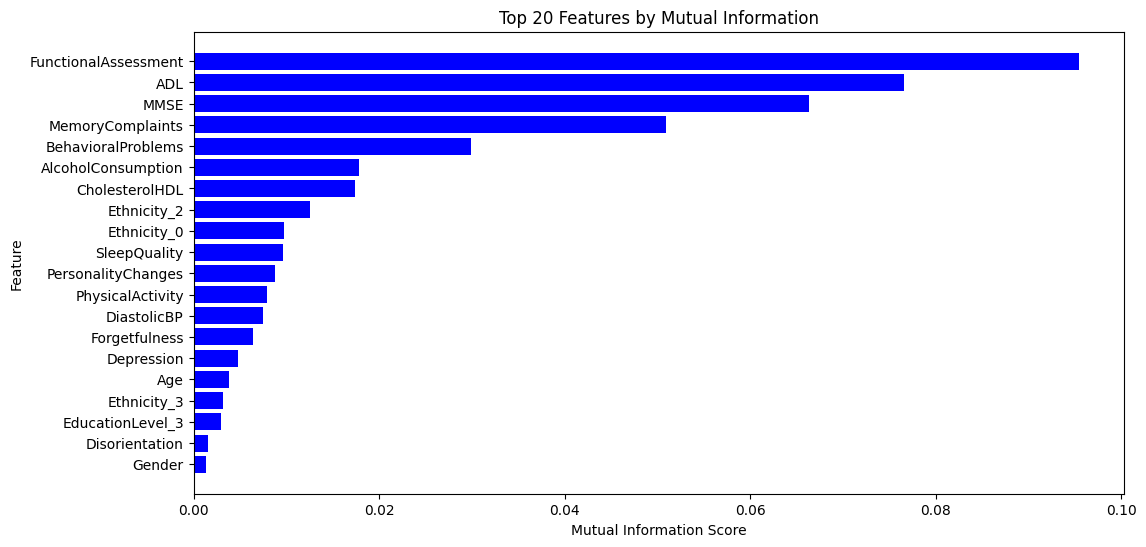

In [65]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x, y, discrete_features='auto', random_state=42)

mi_df = pd.DataFrame({'Feature': x.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)  # Sort by importance

print("Top 20 Features by Mutual Information Score:")
print(mi_df.head(20))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(mi_df['Feature'][:20], mi_df['MI Score'][:20], color='blue')
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title("Top 20 Features by Mutual Information")
plt.gca().invert_yaxis()  # Highest MI at the top
plt.show()


## top 20 feature 

In [5]:
from collections import Counter

# Define the feature lists
Spearman_correlation = [
    "FunctionalAssessment", "ADL", "MemoryComplaints", "MMSE", "BehavioralProblems",
    "SleepQuality", "CholesterolHDL", "EducationLevel_0", "Ethnicity_2", "Hypertension",
    "Ethnicity_1", "FamilyHistoryAlzheimers", "CholesterolLDL", "Diabetes", "CardiovascularDisease",
    "EducationLevel_3", "BMI", "Ethnicity_3", "Disorientation", "CholesterolTriglycerides"
]

pca_features = [
    "Ethnicity_2", "EducationLevel_3", "Ethnicity_3", "Diabetes", "CholesterolTriglycerides",
    "Ethnicity_1", "MemoryComplaints", "BMI", "DietQuality", "SleepQuality",
    "FunctionalAssessment", "CholesterolLDL", "AlcoholConsumption", "Hypertension", "CholesterolHDL",
    "Forgetfulness", "BehavioralProblems", "PersonalityChanges", "Gender", "HeadInjury"
]

mi = [
    "FunctionalAssessment", "ADL", "MMSE", "MemoryComplaints", "BehavioralProblems",
    "AlcoholConsumption", "CholesterolHDL", "Ethnicity_2", "Ethnicity_0", "SleepQuality",
    "PersonalityChanges", "PhysicalActivity", "DiastolicBP", "Forgetfulness", "Depression",
    "Age", "Ethnicity_3", "EducationLevel_3", "Disorientation", "Gender"
]

chi2_anova_features = ['Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3', 'EducationLevel_3', 
                           'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 
                           'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'BMI', 
                           'DietQuality', 'SleepQuality', 'SystolicBP', 'CholesterolLDL', 
                           'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 
                           'FunctionalAssessment', 'ADL']

rfe_features = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 
                    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
                    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 
                    'FunctionalAssessment', 'ADL', 'Ethnicity_1', 'EducationLevel_2', 
                    'Gender', 'MemoryComplaints', 'BehavioralProblems']

pca_features = ['FunctionalAssessment', 'CholesterolTriglycerides', 'CholesterolLDL', 
                    'Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'DiastolicBP', 
                    'MMSE', 'CholesterolTotal', 'SleepQuality', 'EducationLevel_1', 'Gender', 
                    'MemoryComplaints', 'Smoking', 'Forgetfulness']

# Combine all feature lists
all_features = Spearman_correlation + pca_features + mi + chi2_anova_features + rfe_features + pca_features

# Count occurrences of each feature
feature_counts = Counter(all_features)

# Filter features that appear at least twice
common_features = [feature for feature, count in feature_counts.items() if count >= ]

# Print the result
print("Features appearing at least twice:")
print(common_features)


Features appearing at least twice:
['FunctionalAssessment', 'MemoryComplaints', 'MMSE', 'SleepQuality', 'CholesterolLDL', 'BMI', 'CholesterolTriglycerides']
